# Lending Club Payment Risk Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import pickle

## 1. Importing Transaction data

### 1.1  historical 2018 Q1 data

In [2]:
# df_old1 = pd.read_csv('/Users/Stephanie_Zhang/Desktop/lendingclub/LoanStats_securev1_2018Q1.csv', skiprows=1)
df_old2 = pd.read_csv('/Users/Stephanie_Zhang/Desktop/lendingclub/LoanStats_2017Q1.csv', skiprows=1)
df_old3 = pd.read_csv('/Users/Stephanie_Zhang/Desktop/lendingclub/LoanStats_2017Q2.csv', skiprows=1)
df_old4 = pd.read_csv('/Users/Stephanie_Zhang/Desktop/lendingclub/LoanStats_2017Q3.csv', skiprows=1)
df_old5 = pd.read_csv('/Users/Stephanie_Zhang/Desktop/lendingclub/LoanStats_2017Q4.csv', skiprows=1)
# df_old6 = pd.read_csv('/Users/Stephanie_Zhang/Desktop/lendingclub/LoanStats3d.csv', skiprows=1)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,112) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# len(df_old1.columns), 
len(df_old2.columns), len(df_old3.columns), len(df_old4.columns), len(df_old5.columns), \
# len(df_old6.columns),
len(df_old2), len(df_old3), len(df_old4), len(df_old5), \
# len(df_old6)

(96781, 105453, 122703, 118650)

In [4]:
df_old = pd.concat((df_old2, df_old3, df_old4, df_old5), axis = 0)

In [5]:
len(df_old.columns), len(df_old)

(145, 443587)

In [6]:
df_old.shape

(443587, 145)

In [7]:
import requests
import json
header = { 'Authorization': 'MFlsdMVZe6dtdw/RzMruKtl6y1k='}
r = requests.get("https://api.lendingclub.com/api/investor/v1/loans/listing", headers = header)

In [8]:
type(r.json())

dict

In [9]:
data = r.json()
myData = data['loans']
with open('testdata.txt', 'w') as outfile:
    json.dump(myData, outfile)
df_Curr = pd.read_json('testdata.txt')

In [10]:
len(df_Curr)

63

In [11]:
df_Curr.columns

Index(['accNowDelinq', 'accOpenPast24Mths', 'acceptD', 'addrState', 'addrZip',
       'allUtil', 'annualInc', 'annualIncJoint', 'applicationType',
       'avgCurBal',
       ...
       'totCollAmt', 'totCurBal', 'totHiCredLim', 'totalAcc', 'totalBalExMort',
       'totalBalIl', 'totalBcLimit', 'totalCuTl', 'totalIlHighCreditLimit',
       'totalRevHiLim'],
      dtype='object', length=119)

### 1.3 Column Name Adjustment for the data in 2016 and 2017

In [12]:
listOld = []
for column_name in df_old.columns.values:
    Name = column_name.replace("_","")
    listOld.append(Name)
#     print (Name)

In [13]:
def CapDown (string):
    for i in range (len(string)):
        string = string[0: i] + string[i].lower() + string[i+1:]
    return string

In [14]:
listCurr = []
for column_name in df_Curr.columns.values:
    listCurr.append(CapDown(column_name))
#     print (CapDown(column_name))

### 1.4 Variable Column Compare between the data of 2016 and 2017

In [15]:
def compareCol (list1, list2):
    same = []
    different = []
    for i in range (len(list1)):
        if list1[i] in list2:
            same.append(list1[i])
        else:
            different.append(list1[i])
    return same, different

In [16]:
sameCurr, differentCurr = compareCol(listCurr, listOld)
sameOld, differentOld = compareCol(listOld, listCurr)
# print (differentCurr)
# print (differentOld)

In [17]:
def LCS (str1, str2):
    m = len(str1)
    n = len(str2)
    max = 0
    common = list()
    count = [[0] * (n + 1) for x in range (m + 1)]
    for i in range (m + 1):
        count [i][0] = 0
    for j in range (n + 1):
        count [0][j] = 0
    for i in range (1, m + 1):
        for j in range (1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                count[i][j] = count[i - 1][j - 1] + 1
                if max < count[i][j]:
                    max = count[i][j]
                    common.append(str1[i - 1])
            else:
                count[i][j] = 0
    return (max)

In [18]:
print (LCS ('happy', 'halloppy'))

3


In [19]:
# for i in range (len(differentCurr)):
#     for j in range (len(differentOld)):
#         if LCS (differentCurr[i], differentOld[j]) > 3 : 
#             print (LCS (differentCurr[i], differentOld[j]), differentCurr[i], differentOld[j])

### 1.5 Adjust the Columns

In [20]:
# rename according to the name comparison
df_Curr.columns = listCurr
df_old.columns = listOld
# df_Curr.columns, df_old.columns

df_Curr = df_Curr.rename(columns={'creditpulld': 'lastcreditpulld'})
df_Curr = df_Curr.rename(columns={'fundedamount': 'fundedamnt'})
df_Curr = df_Curr.rename(columns={'loanamount': 'loanamnt'})
df_Curr = df_Curr.rename(columns={'numacctsever120ppd': 'numacctsever120pd'})

In [21]:
# another round of calculating the same and difference list
sameCurr2, differentCurr2 = compareCol(df_Curr.columns, df_old.columns)
sameOld2, differentOld2 = compareCol(df_old.columns, df_Curr.columns)
print (differentCurr2)
print (differentOld2)

['acceptd', 'addrzip', 'expd', 'expdefaultrate', 'ficorangehigh', 'ficorangelow', 'housingpayment', 'ilsexpd', 'investorcount', 'isincv', 'isincvjoint', 'listd', 'mtgpayment', 'reviewstatus', 'reviewstatusd', 'secappficorangehigh', 'secappficorangelow', 'servicefeerate']
['fundedamntinv', 'verificationstatus', 'issued', 'loanstatus', 'pymntplan', 'url', 'title', 'zipcode', 'outprncp', 'outprncpinv', 'totalpymnt', 'totalpymntinv', 'totalrecprncp', 'totalrecint', 'totalreclatefee', 'recoveries', 'collectionrecoveryfee', 'lastpymntd', 'lastpymntamnt', 'nextpymntd', 'policycode', 'verificationstatusjoint', 'hardshipflag', 'hardshiptype', 'hardshipreason', 'hardshipstatus', 'deferralterm', 'hardshipamount', 'hardshipstartdate', 'hardshipenddate', 'paymentplanstartdate', 'hardshiplength', 'hardshipdpd', 'hardshiploanstatus', 'origprojectedadditionalaccruedinterest', 'hardshippayoffbalanceamount', 'hardshiplastpaymentamount', 'debtsettlementflag', 'debtsettlementflagdate', 'settlementstatus',

In [22]:
# will delete the difference in new list differentCurr2
for i in range(len(differentCurr2)):
    df_Curr = df_Curr.drop(differentCurr2[i], 1)
len(df_Curr.columns)

101

In [23]:
# will delete the difference in new list differentOld2:
for i in range(len(differentOld2)):
    if differentOld2[i] != 'loanstatus' and differentOld2[i] != 'issued':
        df_old = df_old.drop(differentOld2[i], 1)
len(df_old.columns)

103

# 2. Split train & test data, and aggregate into Full_data

### 2.1 Target variable: loanstatus

In [24]:
print(df_old.loanstatus.value_counts())
df_old_select = df_old.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' or loanstatus == 'default'")
df_old_select['loanstatus'] = df_old_select.loanstatus.map({"Charged Off": 0, "default": 0, "Fully Paid": 1})
# print(ddf_old_select.loanstatus)
print(df_old_select.loanstatus.value_counts())

Current               371147
Fully Paid             51219
Charged Off             8577
Late (31-120 days)      7144
In Grace Period         3174
Late (16-30 days)       2198
Default                  120
Name: loanstatus, dtype: int64
1    51219
0     8577
Name: loanstatus, dtype: int64


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
df_old_select = df_old.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' or loanstatus == 'default'")
df_old_select['loanstatus'] = df_old_select.loanstatus.map({"Charged Off": 0, "default": 0, "Fully Paid": 1})

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Upsampling

In [26]:
upsampling = df_old_select.query("loanstatus == 0")

In [27]:
for i in range(10):
    df_old_select = pd.concat((df_old_select, upsampling), axis = 0)

In [28]:
len(df_old_select)

145566

In [29]:
df_old_select.loanstatus.value_counts()

0    94347
1    51219
Name: loanstatus, dtype: int64

In [30]:
df_old_select.to_csv('df_old_select_0528.csv')

### 2.2 Split into test and train data according to timestamp

In [31]:
df_old_select['issued'] = df_old_select.issued.apply(lambda x: x.split("-")[0])
df_test = df_old_select.query("issued =='Dec' or issued == 'Nov' or issued == 'Oct'")
df_train = df_old_select.query("issued !='Dec' and issued != 'Nov' and issued != 'Oct'")
df_test['flag'] = 0
df_train['flag'] = 1
df_Curr['flag'] = 2
Full_data = pd.concat((df_test, df_train, df_Curr), axis=0, ignore_index=True)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [32]:
print(len(Full_data.columns), len(Full_data))
print(len(df_Curr.columns), len(df_old.columns), len(listCurr), len(listOld), len(df_Curr), len(df_old))

104 145629
102 103 119 145 63 443587


# Grouping variables

In [33]:
# for column_name in Full_data.columns.values:
#     print (column_name, ":  ", Full_data[column_name].dtype)

## 3. Checking with Null

In [34]:
columns_list = Full_data.isnull().sum()

In [35]:
columns_list.loc[columns_list > 40000]

annualincjoint                   137393
desc                             145629
dtijoint                         137393
id                               145566
memberid                         145566
mthssincelastdelinq               70383
mthssincelastmajorderog          103506
mthssincelastrecord              115442
mthssincerecentbcdlq             110299
mthssincerecentrevoldelinq        94983
revolbaljoint                    139280
secappchargeoffwithin12mths      139280
secappcollections12mthsexmed     139280
secappearliestcrline             139280
secappinqlast6mths               139280
secappmortacc                    139280
secappmthssincelastmajorderog    142808
secappnumrevaccts                139280
secappopenacc                    139280
secappopenactil                  139280
secapprevolutil                  139511
dtype: int64

#### drop null columns

In [36]:
# drop null columns
Full_data = Full_data.drop('annualincjoint', 1)
Full_data = Full_data.drop('desc', 1)
Full_data = Full_data.drop('dtijoint', 1)
Full_data = Full_data.drop('id', 1)
Full_data = Full_data.drop('memberid', 1)
Full_data = Full_data.drop('mthssincelastmajorderog', 1)
Full_data = Full_data.drop('mthssincelastrecord', 1)
Full_data = Full_data.drop('mthssincerecentbcdlq', 1)
Full_data = Full_data.drop('revolbaljoint', 1)
Full_data = Full_data.drop('secappchargeoffwithin12mths', 1)
Full_data = Full_data.drop('secappcollections12mthsexmed', 1)
Full_data = Full_data.drop('secappearliestcrline', 1)
Full_data = Full_data.drop('secappinqlast6mths', 1)
Full_data = Full_data.drop('secappmortacc', 1)
Full_data = Full_data.drop('secappopenactil', 1)
Full_data = Full_data.drop('secapprevolutil', 1)
Full_data = Full_data.drop('secappmthssincelastmajorderog', 1)
Full_data = Full_data.drop('secappnumrevaccts', 1)
Full_data = Full_data.drop('secappopenacc', 1)

In [37]:
len(Full_data.columns)

85

## 4. Feature Engineering

### 4.1 Grouping variables into continuous and categorical

In [38]:
# Value grouping into continuous and categorical
Con_cols = [i for i in Full_data.columns if (Full_data.dtypes[i] =='float64' or Full_data.dtypes[i] == 'int64')]
Cat_cols = [i for i in Full_data.columns if (i not in Con_cols) & (i !='id')]
len(Con_cols), len(Cat_cols)
print(Con_cols)
print(Cat_cols)

['accnowdelinq', 'accopenpast24mths', 'allutil', 'annualinc', 'avgcurbal', 'bcopentobuy', 'bcutil', 'chargeoffwithin12mths', 'collections12mthsexmed', 'delinq2yrs', 'delinqamnt', 'dti', 'flag', 'fundedamnt', 'ilutil', 'inqfi', 'inqlast12m', 'inqlast6mths', 'installment', 'loanamnt', 'loanstatus', 'maxbalbc', 'mortacc', 'mosinoldilacct', 'mosinoldrevtlop', 'mosinrcntrevtlop', 'mosinrcnttl', 'mthssincelastdelinq', 'mthssincercntil', 'mthssincerecentbc', 'mthssincerecentinq', 'mthssincerecentrevoldelinq', 'numacctsever120pd', 'numactvbctl', 'numactvrevtl', 'numbcsats', 'numbctl', 'numiltl', 'numoprevtl', 'numrevaccts', 'numrevtlbalgt0', 'numsats', 'numtl120dpd2m', 'numtl30dpd', 'numtl90gdpd24m', 'numtloppast12m', 'openacc', 'openacc6m', 'openactil', 'openil12m', 'openil24m', 'openrv12m', 'openrv24m', 'pcttlnvrdlq', 'percentbcgt75', 'pubrec', 'pubrecbankruptcies', 'revolbal', 'taxliens', 'totalacc', 'totalbalexmort', 'totalbalil', 'totalbclimit', 'totalcutl', 'totalilhighcreditlimit', 'tot

### 4.2 target variable distribution

In [39]:
Full_data.loanstatus.value_counts()

0.0    94347
1.0    51219
Name: loanstatus, dtype: int64

In [40]:
print(len(Full_data.columns), len(Full_data))
print(len(df_Curr.columns), len(df_old.columns), len(listCurr), len(listOld), len(df_Curr), len(df_old))

85 145629
102 103 119 145 63 443587


### 4.3 Feature engineering

#### 4.3.1 Grade, subgrade

In [41]:
# grade
grade_dic = {"A": 1, "B": 2, "C": 3, "D": 4, "E":5, "F":6, "G":7} 
Full_data.grade = Full_data.grade.map(grade_dic)
# subgrade
Full_data.subgrade = Full_data.subgrade.apply(lambda x: (grade_dic[x[0]]) + int(x[1])/10)

#### 4.3.2 Addrstate

In [42]:
# addrstate
addrstate_freq = Full_data.groupby("addrstate").size().reset_index()
addrstate_freq.columns = ["addrstate", "addrstate_freq"]
Full_data = pd.merge(Full_data, addrstate_freq, how = "left", on = "addrstate")
# drop addrstate
# Full_data.drop('addrstate', axis =1)

#### 4.3.3 emptitle

In [43]:
#emptitle
emptitle_freq = Full_data.groupby("emptitle").size().reset_index()
emptitle_freq.columns = ["emptitle", "emptitle_freq"]
Full_data = pd.merge(Full_data, emptitle_freq, how = "left", on = "emptitle")
Full_data = Full_data.drop('emptitle', axis = 1)

#### 4.3.4 null -> 'n/a' --> nan

In [44]:
# all data
Full_data.replace('n/a', np.nan, inplace = True)

#### 4.3.5 intrate

In [45]:
# intrate
Full_data.intrate = pd.Series(Full_data.intrate).str.replace('%', '').astype(float)

#### 4.3.6 revoluntil

In [46]:
# revoluntil
Full_data.revolutil = pd.Series(Full_data.revolutil).str.replace('%', '').astype(float)

#### 4.3.7 emplength

In [47]:
Full_data['emplength'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
Full_data.emplength.fillna(value=0,inplace=True)
Full_data['emplength'] = Full_data['emplength'].astype(int)
Full_data['emplength'] = Full_data['emplength'].apply(lambda x: x/12 if x>10 else x)

In [48]:
# Full_data['emplength'].value_counts()

#### 4.3.8 drop lastcreditpulld (due to time series)

In [49]:
Full_data = Full_data.drop('lastcreditpulld', axis = 1)

#### 4.3.9 'term'

In [50]:
Full_data.term.replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
Full_data['term'] = Full_data.term.astype(int)
Full_data.term.value_counts()

36    105036
60     40593
Name: term, dtype: int64

#### 4.3.10 'earliestcrline'

In [51]:
Full_data.earliestcrline.replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
Full_data['earliestcrline'] = Full_data['earliestcrline'].apply(lambda x: x[:4])
Full_data['earliestcrline'] = Full_data['earliestcrline'].astype('int')

#### 4.3.11 'applicationtype'

In [52]:
Full_data['applicationtype'] = Full_data['applicationtype'].apply(lambda x: 'Individual' \
                        if x == 'INDIVIDUAL' else 'Joint App' if x == 'JOINT' else x)

In [53]:
Full_data.applicationtype.value_counts()

Individual    137393
Joint App       8236
Name: applicationtype, dtype: int64

#### 4.3.11 categorical variables - one-hot encoding

In [54]:
dummy = ['applicationtype', 
'disbursementmethod',
'earliestcrline',
'homeownership', 
'initialliststatus',  
'issued', 
'purpose', 
'term', 
'addrstate']

In [55]:
test_Full_data = Full_data

In [56]:
for col in dummy:
    print ("One-hot encoding  %s" % (col))
    one_hot = pd.get_dummies(test_Full_data[col])
    test_Full_data = pd.concat([test_Full_data,one_hot], axis=1)
    test_Full_data = test_Full_data.drop(col, axis =1)

One-hot encoding  applicationtype
One-hot encoding  disbursementmethod
One-hot encoding  earliestcrline
One-hot encoding  homeownership
One-hot encoding  initialliststatus
One-hot encoding  issued
One-hot encoding  purpose
One-hot encoding  term
One-hot encoding  addrstate


In [57]:
len(test_Full_data.columns)

226

#### 4.3.10 Fill NA with -1

In [58]:
# Full_data = Full_data.fillna(Full_data.median())
test_Full_data = test_Full_data.fillna(-1)

# 5. Train & Test Split

In [163]:
train = test_Full_data.loc[Full_data['flag'] == 1]
valid = test_Full_data.loc[Full_data['flag'] == 0]
test_predict = test_Full_data.loc[Full_data['flag'] == 2]

In [60]:
len(train.columns),len(test_Full_data.columns)

(226, 226)

In [61]:
X_train = train.drop("loanstatus", axis=1)
Y_train = train["loanstatus"]
X_valid = valid.drop("loanstatus", axis=1)
Y_valid = valid["loanstatus"]
X_test_predict = test_predict.drop("loanstatus", axis=1)

In [62]:
len(test_predict), len(train), len(valid)

(63, 137227, 8339)

In [63]:
print(len(X_train), len(X_train.columns), len(X_valid))

137227 225 8339


#### Result:   train set: 137227,   test set: 8339,    225 variables

# 6. Model Selection & Tuning

### 6.1 Random Forest Classifier

In [64]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# RF = RandomForestClassifier()#linearregression
# RF = RF.fit(X_train, Y_train)
# y_pred = RF.predict(X_test)

In [65]:
# print (metrics.classification_report(Y_test, y_pred))# accuracy

### 6.2 Gradient Boosting Tree Classifier

In [66]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
est2 = GradientBoostingClassifier(n_estimators=500, max_depth=5)
est2.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [67]:
Y_train.value_counts()

0.0    92345
1.0    44882
Name: loanstatus, dtype: int64

In [68]:
Y_valid.value_counts()

1.0    6337
0.0    2002
Name: loanstatus, dtype: int64

In [72]:
Y_valid_pred = est2.predict(X_valid)
from sklearn import metrics
print (metrics.classification_report(Y_valid, Y_valid_pred))

             precision    recall  f1-score   support

        0.0       0.50      0.75      0.60      2002
        1.0       0.91      0.76      0.83      6337

avg / total       0.81      0.76      0.77      8339



In [73]:
pickle.dump(est2, open('gbm_model.pkl', "wb"))

#### 6.2.1 Gradient Boosting Tree - ROC Curve

In [74]:
import seaborn as sns

In [75]:
from sklearn import linear_model, datasets
import pylab as pl
def draw_ROC(model, dtrain, dvalid, y_train, y_valid):
    probas_ = model.predict(dvalid)
    probas_1 = model.predict(dtrain)
    fpr, tpr, thresholds = roc_curve(y_valid, probas_)
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, probas_1)
    roc_auc = auc(fpr, tpr)
    roc_auc_1 = auc(fpr_1, tpr_1)
    print ("Area under the ROC curve - test: %f" % roc_auc)
    print ("Area under the ROC curve - train: %f" % roc_auc_1)
    # Plot ROC curve
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC curve - test(AUC = %0.2f)' % roc_auc, color='r')
    plt.plot(fpr_1, tpr_1, label='ROC curve - train (AUC = %0.2f)' % roc_auc_1, color='b')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for lead score model')
    plt.legend(loc="lower right")
    plt.show()
    sns.despine()

Area under the ROC curve - test: 0.757311
Area under the ROC curve - train: 0.904662


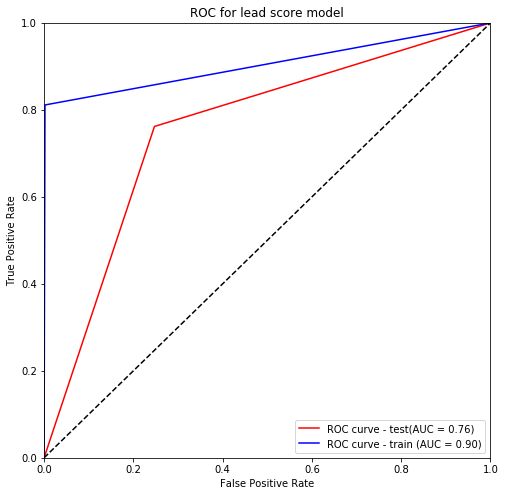

In [76]:
from sklearn.metrics import roc_curve, auc
draw_ROC(est2, X_train, X_valid, Y_train, Y_valid)

#### 6.2.2 Gradient Boosting Tree - Prediction Distribution

In [79]:
Y_pred = est2.predict_proba(X_valid)
print (Y_pred.max(), Y_pred.min(), Y_pred.mean())

0.999988961597378 1.1038402621954546e-05 0.5


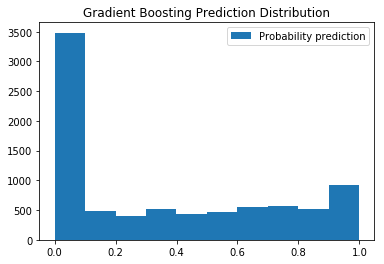

In [80]:
plt.hist(Y_pred[:,0], label = 'Probability prediction')
plt.legend()
plt.title('Gradient Boosting Prediction Distribution')
plt.show()

## 6.3 XGBoost Classifier

#### 6.3.1 XGboost Modeling

In [81]:
import xgboost as xgb

In [82]:
dtrain = xgb.DMatrix(X_train, Y_train, missing = np.NAN)
dvalid = xgb.DMatrix(X_valid, Y_valid, missing = np.NAN)

In [83]:
params = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.632, 
          "colsample_bytree": 0.7,
          #"colsample_bylevel": 0.6,
          "silent": 1, 
          "seed": 1441, 
          "eval_metric": "auc",
          #"gamma": 1, 
          "min_child_weight": 5} # 74453

In [84]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 1500
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[0]	train-auc:0.891204	eval-auc:0.864688
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.885341	eval-auc:0.819533
[2]	train-auc:0.872246	eval-auc:0.793173
[3]	train-auc:0.891888	eval-auc:0.827313
[4]	train-auc:0.898375	eval-auc:0.843505
[5]	train-auc:0.894549	eval-auc:0.829777
[6]	train-auc:0.890844	eval-auc:0.820615
[7]	train-auc:0.88738	eval-auc:0.812423
[8]	train-auc:0.894307	eval-auc:0.825853
[9]	train-auc:0.899093	eval-auc:0.837139
[10]	train-auc:0.901804	eval-auc:0.8435
[11]	train-auc:0.903781	eval-auc:0.847473
[12]	train-auc:0.905142	eval-auc:0.852687
[13]	train-auc:0.906086	eval-auc:0.856773
[14]	train-auc:0.905942	eval-auc:0.851661
[15]	train-auc:0.907756	eval-auc:0.857684
[16]	train-auc:0.908218	eval-auc:0.860905
[17]	train-auc:0.908651	eval-auc:0.86321
[18]	train-auc:0.909222	eval-auc:0.865322
[19]	train-auc:0.909344	eval-auc:0.862282
[20]	train-auc:0.909523	eval-auc:

Stopping. Best iteration:
[140]	train-auc:0.943224	eval-auc:0.878957



In [85]:
pickle.dump(gbm, open('model.pkl', "wb"))

#### 6.3.2 XGboost - ROC Curve

Area under the ROC curve - test: 0.878300
Area under the ROC curve - train: 0.952903


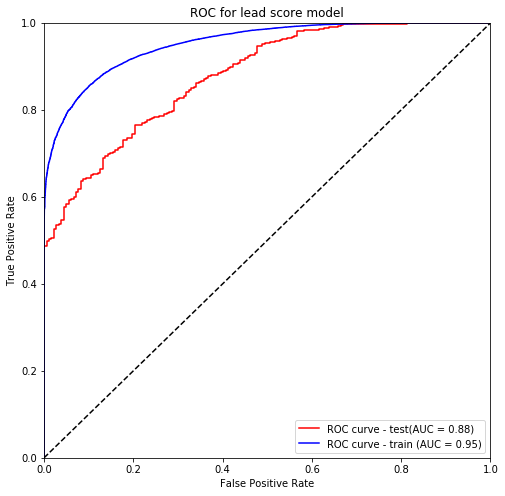

In [86]:
draw_ROC(gbm, dtrain, dvalid, Y_train, Y_valid)

In [87]:
Y_valid_predict = gbm.predict(dvalid)
Y_valid_predict = pd.DataFrame(Y_valid_predict)
Y_valid_predict = Y_valid_predict.rename(columns = {0: 'prediction'})

#### 6.3.3 XGboost - A loosen Threshold Yields a high F1-Score shown below. While the major task in this project is to minimize risk, so i try the higher Threshold minimize the false positive below

In [88]:
Y_valid_predict['class'] = Y_valid_predict['prediction'].apply(lambda x: 1 if x >0.3 else 0)

In [89]:
print (metrics.classification_report(Y_valid,Y_valid_predict['class'] ))

             precision    recall  f1-score   support

        0.0       0.57      0.68      0.62      2002
        1.0       0.89      0.83      0.86      6337

avg / total       0.81      0.80      0.80      8339



In [90]:
Y_valid_predict['class'].value_counts()

1    5925
0    2414
Name: class, dtype: int64

#### 6.3.4 XGboost Threshold: Tighten for 0.8 Threshold - only allows the safest project to pass through, Achieved 98% precision for class Fully_paid, and 97% recall for class Charged_off or Default

In [91]:
Y_valid_predict['class'] = Y_valid_predict['prediction'].apply(lambda x: 1 if x >0.8 else 0)

In [92]:
print (metrics.classification_report(Y_valid,Y_valid_predict['class'] ))

             precision    recall  f1-score   support

        0.0       0.40      0.97      0.56      2002
        1.0       0.98      0.53      0.69      6337

avg / total       0.84      0.64      0.66      8339



In [93]:
Y_valid_predict['class'].value_counts()

0    4920
1    3419
Name: class, dtype: int64

#### 6.3.5 Further Tighten for 0.9 threshold - Achieved 100% precision for class Fully_paid, and 100% recall for class Charged_off or Default

In [94]:
Y_valid_predict['class'] = Y_valid_predict['prediction'].apply(lambda x: 1 if x >0.9 else 0)

In [95]:
print (metrics.classification_report(Y_valid,Y_valid_predict['class'] ))

             precision    recall  f1-score   support

        0.0       0.38      1.00      0.55      2002
        1.0       1.00      0.48      0.65      6337

avg / total       0.85      0.61      0.63      8339



In [96]:
Y_valid_predict['class'].value_counts()

0    5282
1    3057
Name: class, dtype: int64

#### 6.3.6 Comparision: XGboost vs LC Grade. Compare the accuracy for Lending club's own Grading System with the metrics of my XGboost classifer - My XGboost performs much better in terms of the precision and recall for both classes

In [97]:
grade = X_valid['grade'].apply(lambda x: 1 if x < 3 else 0)

In [98]:
print (metrics.classification_report(Y_valid,grade))

             precision    recall  f1-score   support

        0.0       0.30      0.69      0.42      2002
        1.0       0.83      0.50      0.62      6337

avg / total       0.71      0.54      0.57      8339



#### 6.3.7 Discussion for threshold choosing:

##### The goal for this project is to identify the projects that have the high interest rate according to the Lending Club Grading system, however, of low risk according to our Model prediction. Given this specific goal, we may choose the high threshold that bar out the risk, and screening for the LC grades that is above D-F, which will yield for a high ROI that accomplish our goal

##### Choosing 0.9 as the threshold of our model still retains 37% of the total lenders who are consider safe to invest. And this high-bar threshold almost yield 100% precision in Fully paid on-time. 

#### 6.3.8 Feature Importance in XGboost

In [100]:
# import operator
# def create_feature_map(features):
#     outfile = open('xgb.fmap', 'w')
#     i = 0
#     for feat in features:
#         outfile.write('{0}\t{1}\tq\n'.format(i, feat))
#         i = i + 1
#     outfile.close()
# features = list(X_train.columns)
# create_feature_map(features)

In [122]:
importance = gbm.get_score(importance_type='weight')

In [141]:
import operator
sorted_x = sorted(importance.items(), key=operator.itemgetter(1))

#### 6.3.9 XGboost: The 15 Most Important Features

## 7. Prediction for the Current Projects

#### Given the Xgboost classifier and the 0.9 threshold, we select 30 projects

In [166]:
# X_test_predict = test_predict.drop("loanstatus", axis=1)

In [167]:
X_test_predict_DM = xgb.DMatrix(X_test_predict, missing = np.NAN)
gbm_predict = gbm.predict(X_test_predict_DM)
gbm_predict = pd.DataFrame(gbm_predict)
gbm_predict = gbm_predict.rename(columns = {0: "prediction"})
gbm_predict['classification'] = gbm_predict['prediction'].apply(lambda x: 1 if x > 0.9 else 0)

In [168]:
gbm_predict['classification'].value_counts()

0    33
1    30
Name: classification, dtype: int64

In [173]:
gbm_predict['LC_Grade'] = df_Curr.grade

In [178]:
gbm_predict.loc[gbm_predict.classification==1]

,prediction,classification,LC_Grade
2,0.996419,1,C
3,0.995841,1,A
5,0.995157,1,B
6,0.993063,1,C
7,0.994085,1,D
9,0.996194,1,A
11,0.995589,1,C
17,0.995716,1,C
19,0.996154,1,A
21,0.997315,1,B


#### Finally, Choosing the Lending Club grade D / E in this list will yield high ROI, like the the row number 27 or 37 in the above list, because they are very safe but high interest rate!